<a href="https://colab.research.google.com/github/Jaslinegati/-Exploratory-Data-Analysis/blob/master/IP2_Core_Jasline_Gati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

## a) Specifying the Question

which individuals are most likely to have or use a bank account

## b) Defining the Metric for Success


## c) Understanding the context


Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion.
Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions,
banks still play a pivotal role in facilitating access to financial services. Access to bank accounts 
enables households to save and facilitate payments while also helping businesses build up their credit-worthiness 
and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor
to long-term economic growth.

## d) Recording the Experimental Design


## e) Data Relevance


# 2. Reading the Data


In [0]:
# Importing pandas

import pandas as pd
# Importing numpy

import numpy as np
# Importing seaborn

import seaborn as sns
# Importing Matplotlib
#
import matplotlib.pyplot as plt

In [4]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/FinancialDataset
#

df = pd.read_csv('http://bit.ly/FinancialDataset')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 3.Checking the Data

In [8]:
# Determining the no. of records in our dataset
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [12]:
# Checking the number of rows and columns
df.shape

(23524, 13)

In [13]:
# Getting the information about the dataset
df.info

<bound method DataFrame.info of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...         

In [18]:
#Previewing top records
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [19]:
#Previewing bottom records
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [20]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

# 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

# 5. Tidying the Dataset

In [15]:
#identifying outliers
#1. finding the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year               2.0
household_size     3.0
Respondent_Age    23.0
dtype: float64


In [16]:
#As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an
#output with some true and false values. The data point where we have False that means these values 
#are valid whereas True indicates presence of an outlier.
#print(df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR)).head(10)
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


       Cell Phone Access  Has a Bank account  ...  uniqueid   year
0                  False               False  ...     False  False
1                  False               False  ...     False  False
2                  False               False  ...     False  False
3                  False               False  ...     False  False
4                  False               False  ...     False  False
...                  ...                 ...  ...       ...    ...
23519              False               False  ...     False  False
23520              False               False  ...     False  False
23521              False               False  ...     False  False
23522              False               False  ...     False  False
23523              False               False  ...     False  False

[23524 rows x 13 columns]


TypeError: ignored

In [21]:
df.shape

(23524, 13)

In [22]:
#removing outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(22903, 13)

In [29]:
#df = df.rename(columns = {'Has a Bank account ':'Has_Bank_account ', 'Type of Location  ':'Location_type'})
#df

df= df.rename(columns ={'Has a Bank account ':'Has_Bank_account ', 'Type of Location ':'Location_type','Cell Phone Access ':'Cell_Phone_Access ',
                        'Respondent Age':'Respondent_Age','gender_of_respondent':'respondent_gender','The relathip with head':'relationship_with_head',
                        'Level of Educuation ':'Educuation_level','Type of Job ':'Job_Type '})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22903 entries, 0 to 23522
Data columns (total 13 columns):
country                   22889 non-null object
year                      22903 non-null int64
uniqueid                  22903 non-null object
Has a Bank account        22867 non-null object
Type of Location          22888 non-null object
Cell Phone Access         22892 non-null object
household_size            22876 non-null float64
Respondent_Age            22870 non-null float64
respondent_gender         22870 non-null object
relationship_with_head    22899 non-null object
marital_status            22872 non-null object
Level of Educuation       22874 non-null object
Type of Job               22873 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


In [26]:
df = df.rename({'uniqueid ':'unique_id ',})
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,respondent_gender,relationship_with_head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [27]:
# Identifying the Missing Data
#
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent_Age            33
respondent_gender         33
relationship_with_head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [28]:
# Identifying the Missing Data
#
df.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent_Age             True
respondent_gender          True
relationship_with_head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [58]:
# Checking for the mode of the columns with missing values
df['country'].mode(),


(0    Rwanda
 dtype: object,)

In [0]:
#Filling the missing values with the mode value
df['country']=df['country'].fillna('Rwanda')

In [70]:
# Checking for the mode of the columns with missing values
df['Has a Bank account'].mode(),


(0    No
 dtype: object,)

In [0]:
#Filling the missing values with the mode value
df['Has a Bank account']=df['Has a Bank account'].fillna('No')

In [74]:
# Checking for the mode of the columns with missing values    
#df['Type of Location '].mean(),
df.loc[:, 'Type of Location'].mode()

0    Rural
dtype: object

In [0]:
#Filling the missing values with the mode value
df['Type of Location']=df['Type of Location'].fillna('Rural')

In [75]:
# Checking for the mode of the columns with missing values
#df['Cell Phone Access '].mode(),
df.loc[:, 'Cell Phone Access'].mode()

0    Yes
dtype: object

In [0]:
#Filling the missing values with the mode value
df['Cell Phone Access']=df['Cell Phone Access'].fillna('Yes')

In [84]:
# Checking for the mode of the columns with missing values
#df['household_size '].mode(),
df.loc[:, 'household_size'].mode()

0    2.0
dtype: float64

In [0]:
#Filling the missing values with the mode value
df['household_size']=df['household_size'].fillna('2.0')

In [83]:
# Checking for the mode of the columns with missing values
#df['Respondent_Age '].mode(),
df.loc[:, 'Respondent_Age'].mode()

0    30.0
dtype: float64

In [0]:
#Filling the missing values with the mode value
df['Respondent_Age']=df['Respondent_Age'].fillna('30.0')

In [85]:
# Checking for the mode of the columns with missing values
df['respondent_gender'].mode(),


(0    Female
 dtype: object,)

In [0]:
#Filling the missing values with the mode value
df['respondent_gender']=df['respondent_gender'].fillna('Female')

In [63]:
# Checking for the mode of the columns with missing values

df['relationship_with_head'].mode(),


(0    Head of Household
 dtype: object,)

In [0]:
#Filling the missing values with the mode value
df['relationship_with_head']=df['relationship_with_head'].fillna('Head of Household')

In [62]:
# Checking for the mode of the columns with missing values
df['marital_status'].mode(),


(0    Married/Living together
 dtype: object,)

In [0]:
#Filling the missing values with the mode value
df['marital_status']=df['marital_status'].fillna('Married/Living together')

In [88]:
# Checking for the mode of the columns with missing values
df['Level of Educuation'].mode(),


(0    Primary education
 dtype: object,)

In [0]:
#Filling the missing values with the mode value
df['Level of Educuation']=df['Level of Educuation'].fillna('Primary education')

In [86]:
# Checking for the mode of the columns with missing values
df['Type of Job'].mode()

    

0    Self employed
dtype: object

In [0]:
#Filling the missing values with the mode value
df['Type of Job']=df['Type of Job'].fillna(' Self employed')

In [104]:
#confirming that all nulls have been removed
df.isnull().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent_Age            False
respondent_gender         False
relationship_with_head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [105]:
# Checking for duplicates
df.duplicated().any()

False

In [0]:
# Changing all the columns to lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [107]:
df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'respondent_gender', 'relationship_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

# Exporting the clean dataset


In [0]:
import pandas as pd
import numpy as np
import datetime 

df.to_csv('Clean_ds.csv')

In [112]:
df = pd.read_csv('Clean_ds.csv', encoding='utf-8')
df.head()

,Unnamed: 0,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,level_of_educuation,type_of_job
0,0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#Dropping 'unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace= True)


In [114]:
df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# Univariate, Bivariate and multivariate Analysis

In [118]:
#Finding the count of values in the location column
df['type_of_location'].value_counts()


Rural    13897
Urban     9006
Name: type_of_location, dtype: int64

In [120]:
#extracting the values and indices from the location column
print(
df['type_of_location'].value_counts().index,
df['type_of_location'].value_counts().values
)

Index(['Rural', 'Urban'], dtype='object') [13897  9006]


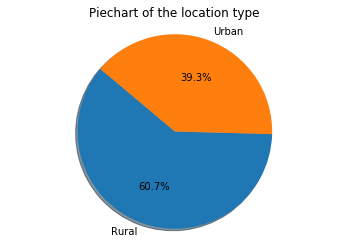

In [124]:
type_of_location=df['type_of_location'].value_counts().index
count=df['type_of_location'].value_counts().values

plt.pie(count, labels=type_of_location, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Piechart of the location type')
plt.show()

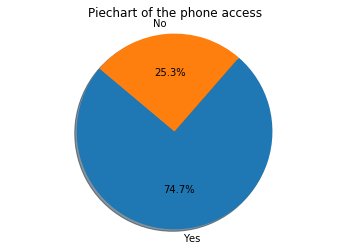

In [125]:
#Finding the count of values in the gender column
df['cell_phone_access'].value_counts()
#Extracting the indices and values from the phone access column
df['cell_phone_access'].value_counts().index
df['cell_phone_access'].value_counts().values

#Ploting a pie chart of the phone access data
label=df['cell_phone_access'].value_counts().index
size=df['cell_phone_access'].value_counts().values

plt.pie(size, labels=label, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Piechart of the phone access')
plt.show()


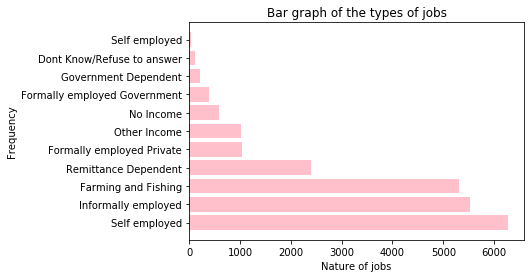

In [128]:

 #Ploting a pie chart of the job column data
label=df['type_of_job'].value_counts().index
size=df['type_of_job'].value_counts().values




plt.barh(label, size, color='pink' )
plt.ylabel('Frequency')
plt.xlabel('Nature of jobs')
plt.title('Bar graph of the types of jobs')
plt.show()

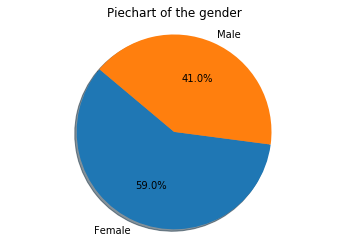

In [131]:
#Finding the count of values in the gender column
df['respondent_gender'].value_counts()
#Extracting the indices and values from the gender column
df['respondent_gender'].value_counts().index
df['respondent_gender'].value_counts().values

#Ploting a pie chart of the gender data
label=df['respondent_gender'].value_counts().index
size=df['respondent_gender'].value_counts().values

plt.pie(size, labels=label, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Piechart of the gender')
plt.show()


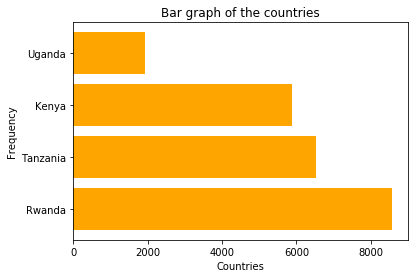

In [132]:
 #Ploting a pie chart of the country column data
label=df['country'].value_counts().index
size=df['country'].value_counts().values




plt.barh(label, size, color='orange' )
plt.ylabel('Frequency')
plt.xlabel('Countries')
plt.title('Bar graph of the countries')
plt.show()

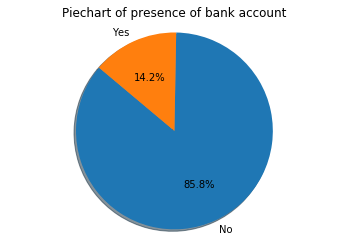

In [133]:
#Determining the count of the data in the country column
df['has_a_bank_account'].value_counts()
#Extracting the indices and values from the gender column
df['has_a_bank_account'].value_counts().index
df['has_a_bank_account'].value_counts().values

#Ploting a pie chart of the gender data
label=df['has_a_bank_account'].value_counts().index
size=df['has_a_bank_account'].value_counts().values

plt.pie(size, labels=label, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Piechart of presence of bank account')
plt.show()

In [135]:
#Finding the skewness and kurtosis of the age data
print(df['respondent_age'].kurt(),
df['respondent_age'].skew()
)

-0.23220827648332865 0.743134553120505


In [136]:
#Determining the skewness and kurtosis of the household size
print(df['household_size'].kurt(),
df['household_size'].skew()
)

-0.4971599525442172 0.6126407148752444


In [137]:
#Measures of central tendency of the household size data
print(df['household_size'].mode(),
df['household_size'].median(),
df['household_size'].mean()
)



0    2.0
dtype: float64 3.0 3.571540846177357


In [139]:
#Measures of central tendency of the age data
print(df['respondent_age'].mean(),
df['respondent_age'].mode(),
df['respondent_age'].median()
)

38.3330568047854 0    30.0
dtype: float64 35.0


In [141]:
#The standard deviation of the age data
df['respondent_age'].std()

15.795804577873735

In [142]:
#The standard deviation of the household size dataset
df['household_size'].std()

2.079257968247656

## Bivariate Analysis

In [144]:
#The correlation in the dataset
df.corr()

,year,household_size,respondent_age
year,1.000000,-0.097283,-0.023745
household_size,-0.097283,1.000000,-0.105635
respondent_age,-0.023745,-0.105635,1.000000


<function matplotlib.pyplot.show>

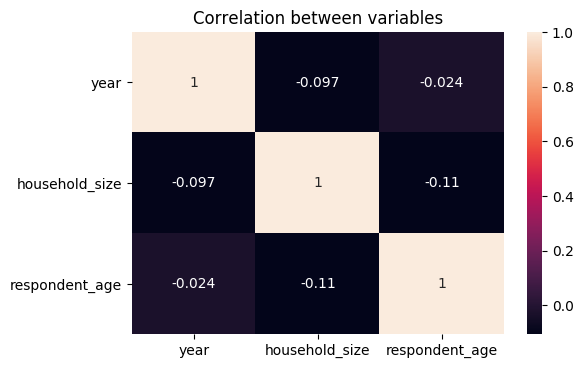

In [146]:
#Checking for correlations between the variables
plt.figure(dpi=100)
cor=df.corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot = True)
plt.title('Correlation between variables')
plt.show

## Multivariate Analysis

In [151]:
df['respondent_gender'] = df.respondent_gender.map({'Female':0, 'Male':1})
df['respondent_gender'] = df.type_of_location.map({'Urban':0, 'Rural':1})
df['respondent_gender'] = df.has_bank_account.map({'No':0, 'Yes':1})

AttributeError: ignored